<a href="https://colab.research.google.com/github/ansehoon1999/hands-on_practice/blob/main/17_machine_leraning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

No GPU was detected. LSTMs and CNNs can be very slow without a GPU.
Go to Runtime > Change runtime and select a GPU hardware accelerator.


In [2]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [4]:
history = autoencoder.fit(X_train, X_train, epochs = 20)
codings = encoder.predict(X_train)

Epoch 1/20
2/2 [==============================] - 1s 4ms/step - loss: 0.2547
Epoch 2/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1032
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 4/20
2/2 [==============================] - 0s 10ms/step - loss: 0.0503
Epoch 5/20
2/2 [==============================] - 0s 8ms/step - loss: 0.0839
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2223
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0913
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0320
Epoch 9/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0242
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0189
Epoch 11/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0142
Epoch 12/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0102
Epoch 13/20
2/2 [==============================] - 0s 7ms/step - loss: 0

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

tf.random.set_seed(42)
np.random.seed(42)

def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3381 - rounded_accuracy: 0.8870 - val_loss: 0.3165 - val_rounded_accuracy: 0.9004
Epoch 2/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3056 - rounded_accuracy: 0.9152 - val_loss: 0.3021 - val_rounded_accuracy: 0.9201
Epoch 3/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2986 - rounded_accuracy: 0.9215 - val_loss: 0.2985 - val_rounded_accuracy: 0.9199
Epoch 4/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2948 - rounded_accuracy: 0.9249 - val_loss: 0.2937 - val_rounded_accuracy: 0.9285
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2923 - rounded_accuracy: 0.9272 - val_loss: 0.2919 - val_rounded_accuracy: 0.9284
Epoch 6/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2904 - rounded_accuracy: 0.9289 - val_loss: 0.2915 - val_ro

In [6]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

Saving figure reconstruction_plot


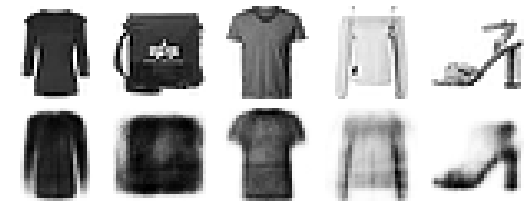

In [7]:
show_reconstructions(stacked_ae)
save_fig("reconstruction_plot")

#합성곱 오토인코더

In [7]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28,28,1], input=[28,28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="selu")
    keras.layers.MaxPool2D(pool_size=2)
])

cov_decoder = keras.models.Sequential([
                                       keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="valid", activation="selu", input_shape=[3,3,64]),
                                       keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same", activation="selu"),
                                       keras.layers.Conv2DTranspose(1, kernel_Size=3, strides=2, padding="same", activation="sigmoid"),
                                       keras.layers.Reshape([28,28])
])

conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])


#순환 오토인코더

In [7]:
recurrent_encoder= keras.models.Sequential([
                                            keras.layers.LSTM(100, return_sequences=True, input=[None, 28]),
                                            keras.layers.LSTM(30)
])

recurrnet_decoder = keras.models.Sequential([
                                             keras.layers.RepeateVector(28, input_shape=[30]),
                                             keras.layers.LSTM(100, return_sequences=True),
                                             keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid"))
])

recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])

#잡음 제거 오토인코더

In [7]:
dropout_encoder = keras.models.Sequential([
                                           keras.layers.Flatten(input_shape=[28,28]),
                                           keras.layers.Dropout(0.5),
                                           keras.layers.Dense(100, activation="selu"),
                                           keras.layers.Dense(30, activation="selu")
])

dropout_decoder = keras.models.Sequential([
                                           keras.layers.Dense(100, activation="selu", input_shape=[30]),
                                           keras.layers.Dense(28*28, activation="sigmoid"),
                                           keras.layers.Reshape([28,28])
])

dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])


#생성적 적대 신경망

In [7]:
codings_size = 30
generator = keras.models.Sequential([
                                     keras.layers.Dense(100, activation="selu", input_shape = [codings_size]),
                                     keras.layers.Dense(150, activation="selu"),
                                     keras.layers.Dense(28*28, activation="sigmoid"),
                                     keras.layers.Reshape([28,28])                                   
])

discriminator = keras.models.Sequential([
                                         keras.layers.Dense(150, activation="selu"),
                                         keras.layers.Dense(100, activation="selu"),
                                         keras.layers.Dense(1, activation="sigmoid")
])

gan = keras.models.Sequential([generator, discriminator])

discriminator.compile(loss="binary_crossentropy", optimizer = "rmsprop")
discriminator.transable = False
gan.compile(loss="binary_crossentropy", optimizer = "rmsprop")
